# **Model Training**
#### **1.1 Import Data and Required Packages**
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
#Modelling
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
import sys
from yellowbrick.cluster import KElbowVisualizer
import seaborn as sns
import matplotlib.colors as colors

#### **Import the CSV Data as Pandas DataFrame**

In [2]:
df = pd.read_csv('cleaned_dataset.csv')

##### Show Top 5 Records

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Tenure_Month,Total_Expenses,AgeGroup,Children
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,3,11,1,58,28.0,1617,Middle Age Adult,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,3,11,0,61,10.0,27,Senior Adult,2
2,4141,1965,Graduation,Married,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,50,17.0,776,Middle Age Adult,0
3,6182,1984,Graduation,Married,26646.0,1,0,2014-02-10,26,11,...,0,0,3,11,0,31,11.0,53,Adult,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,0,34,12.0,422,Adult,1


In [4]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Tenure_Month', 'Total_Expenses', 'AgeGroup',
       'Children'],
      dtype='object')

#### **Preparing X and Y variables**

In [5]:
X = df.drop(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'MntWines', 'MntFruits','MntMeatProducts',
                          'MntFishProducts', 'MntSweetProducts', 'MntGoldProds','Dt_Customer', 'Z_CostContact',
                          'Z_Revenue', 'Recency', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases',
                          'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                          'AcceptedCmp1', 'AcceptedCmp2', 'Complain',  'Response', 'AgeGroup'], axis=1)


In [6]:
X.head()

,Income,Age,Customer_Tenure_Month,Total_Expenses,Children
0,58138.0,58,28.0,1617,0
1,46344.0,61,10.0,27,2
2,71613.0,50,17.0,776,0
3,26646.0,31,11.0,53,1
4,58293.0,34,12.0,422,1


In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Income                 2205 non-null   float64
 1   Age                    2205 non-null   int64  
 2   Customer_Tenure_Month  2205 non-null   float64
 3   Total_Expenses         2205 non-null   int64  
 4   Children               2205 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 86.3 KB


#### **Optimum Clusters Using Elbow Method**

Elbow Method to determine the number of clusters to be formed:


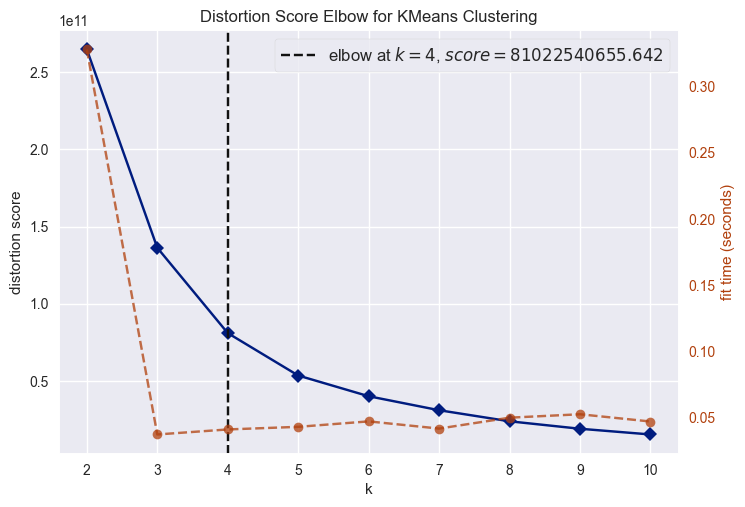

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [8]:
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)
# Setting up colors preferences for dark mode
sns.set_style("darkgrid")
sns.set_palette(sns.color_palette("dark"))

# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(X)
Elbow_M.show()

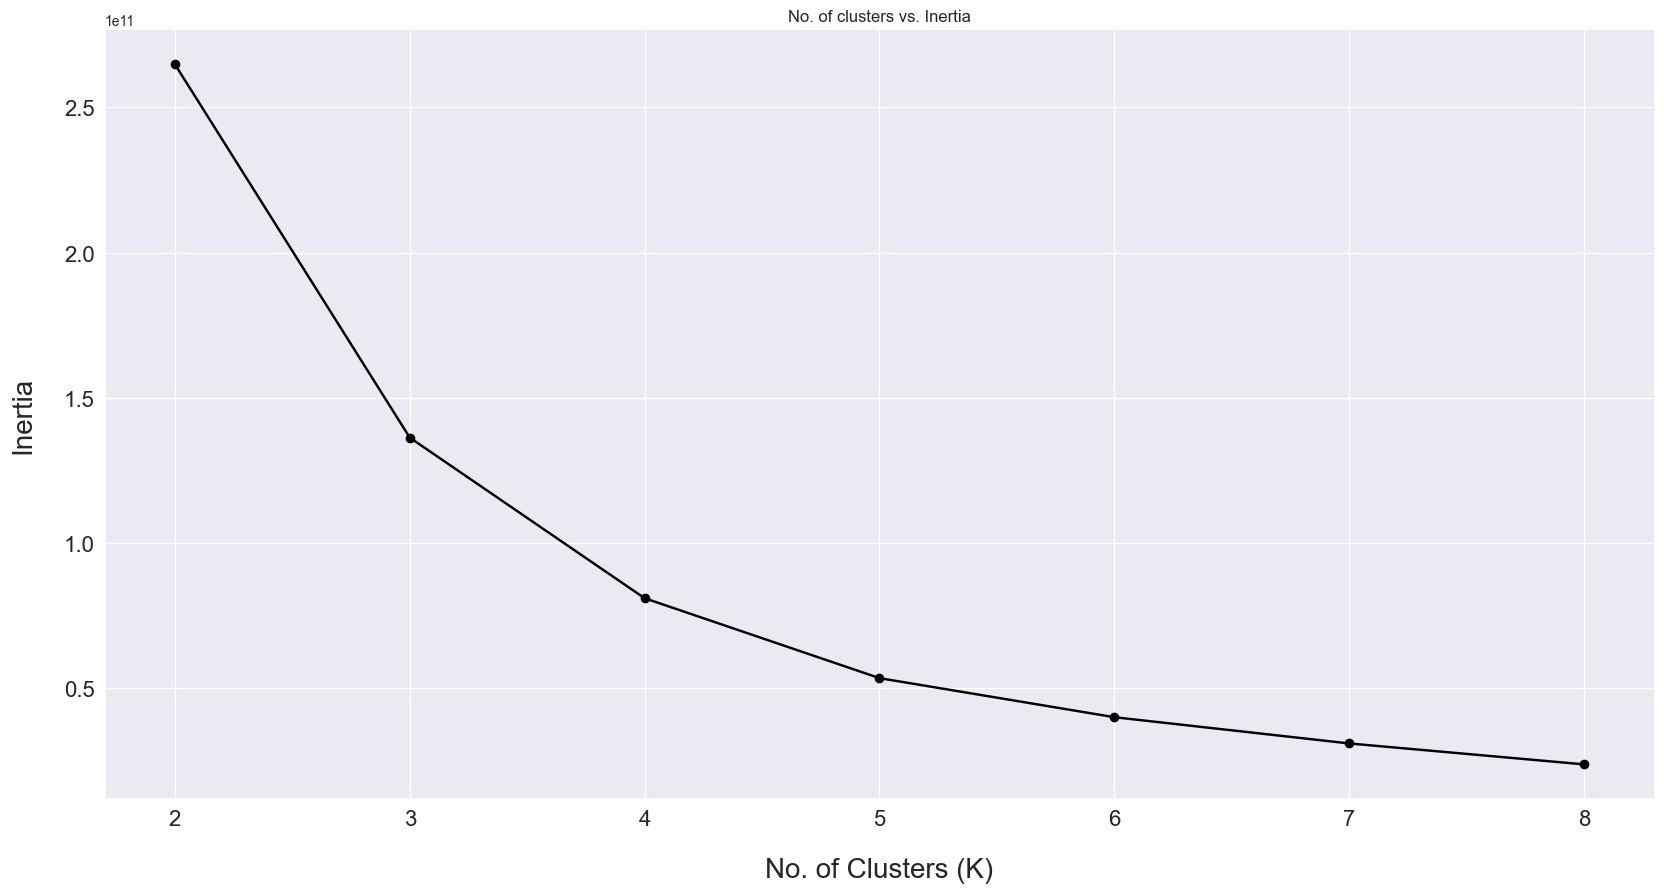

In [9]:
options = range(2, 9)
inertias = []

for n_clusters in options:
    # Explicitly set n_init to suppress the warning
    model = KMeans(n_clusters, random_state=42).fit(X)
    inertias.append(model.inertia_)

plt.figure(figsize=(20, 10))
plt.title("No. of clusters vs. Inertia")
plt.plot(options, inertias, '-o', color='black')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('No. of Clusters (K)', fontsize=20, labelpad=20)
plt.ylabel('Inertia', fontsize=20, labelpad=20)

plt.show()

According to the plot provided, we will categorize customers into 4 clusters, as the inertia value shows minimal reduction beyond 4 clusters.

In [10]:
model = KMeans(n_clusters=4, init='k-means++', random_state=42).fit(X)

preds = model.predict(X)

kmeans_model = X.copy()
kmeans_model['clusters'] = preds

In [11]:
kmeans_model

,Income,Age,Customer_Tenure_Month,Total_Expenses,Children,clusters
0,58138.0,58,28.0,1617,0,2
1,46344.0,61,10.0,27,2,1
2,71613.0,50,17.0,776,0,0
3,26646.0,31,11.0,53,1,3
4,58293.0,34,12.0,422,1,2
...,...,...,...,...,...,...
2200,61223.0,48,19.0,1341,1,2
2201,64014.0,69,7.0,444,3,2
2202,56981.0,34,12.0,1241,0,2
2203,69245.0,59,12.0,843,1,2


In [29]:
model = kmeans_model.to_pickle('kmeans_model.pkl')


#### **Cluster Segmentation**

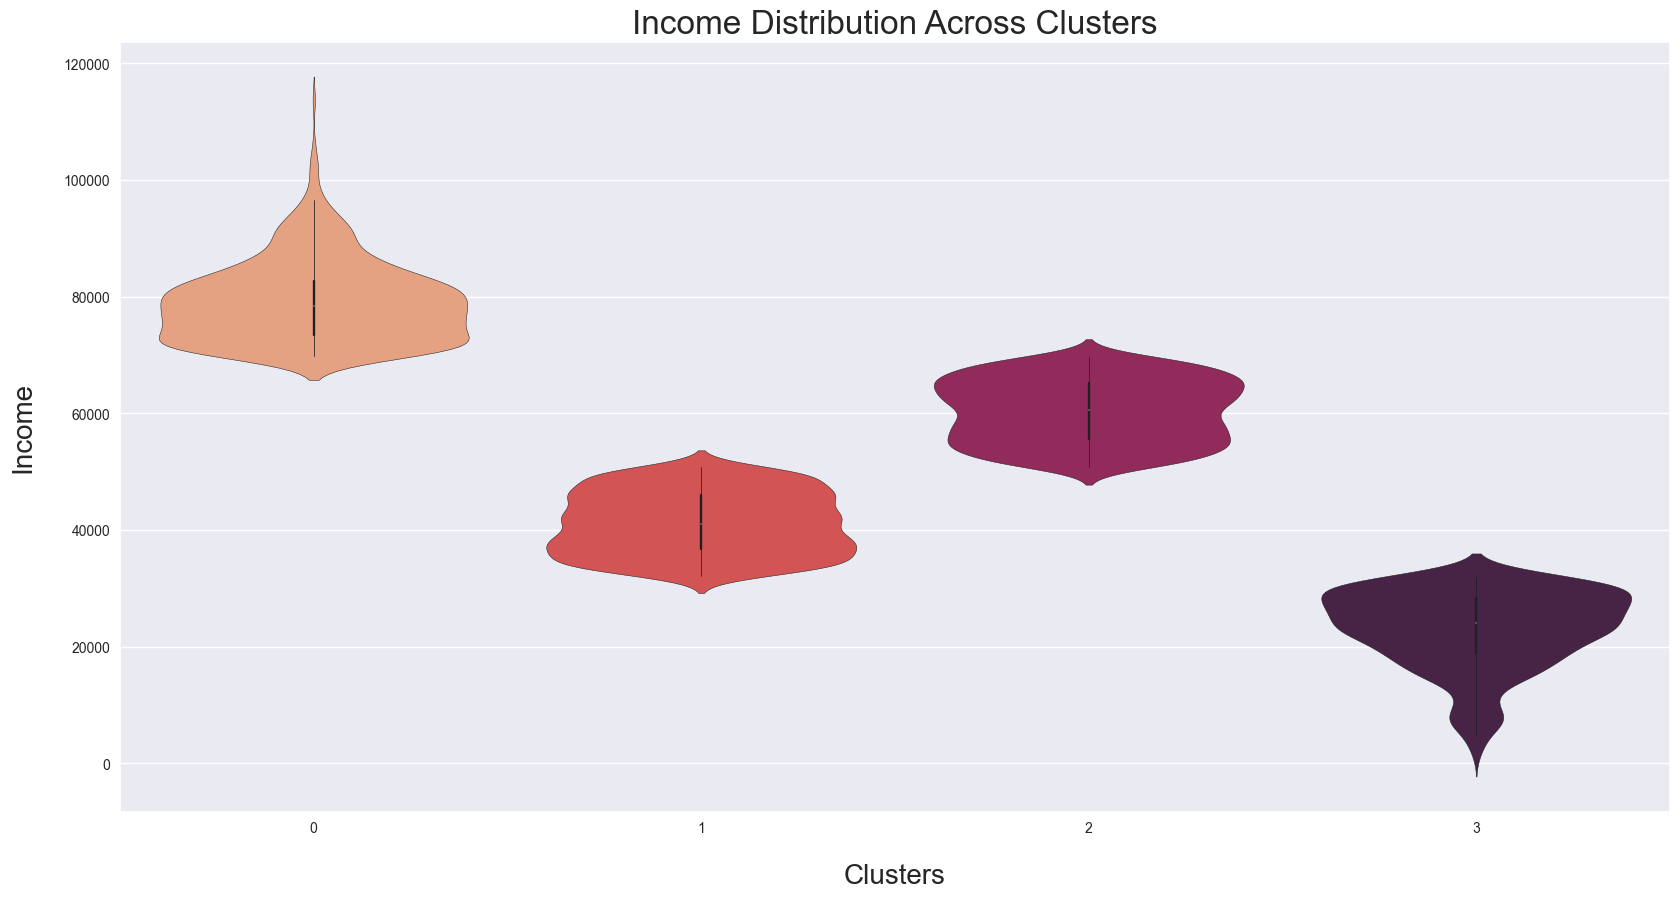

In [12]:
#Income
plt.figure(figsize=(20, 10))

sns.violinplot(data=kmeans_model, x='clusters', y='Income', palette='rocket_r')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Income', fontsize=20, labelpad=20)
plt.title('Income Distribution Across Clusters', fontsize=24)

plt.show()


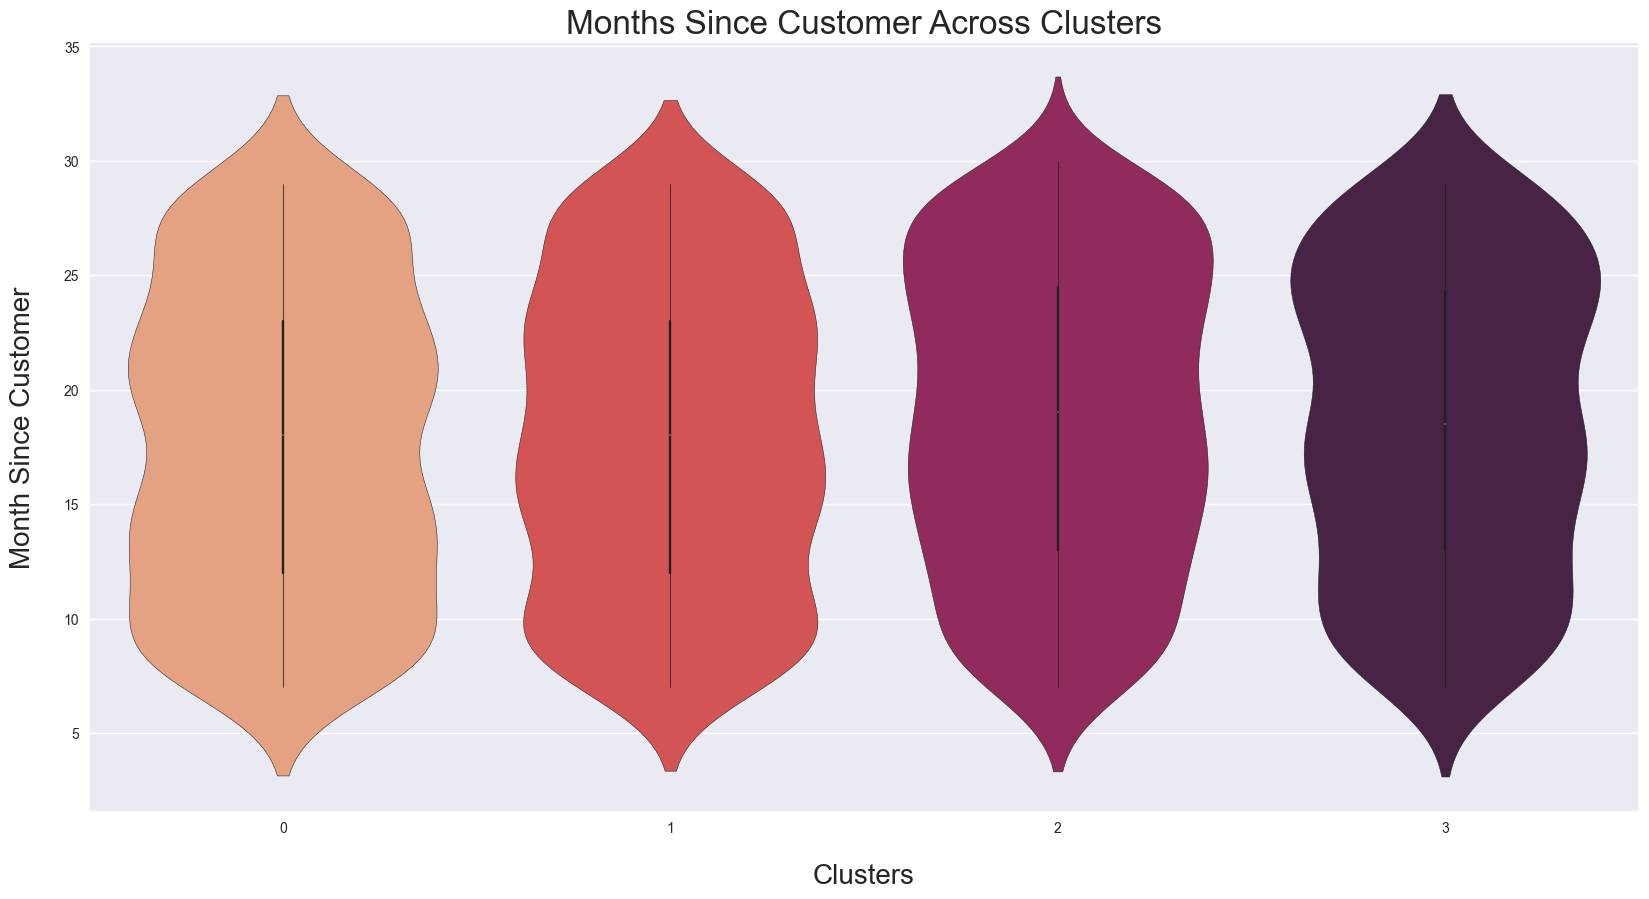

In [13]:
#Customer_Tenure_Month
plt.figure(figsize=(20, 10))

sns.violinplot(data=kmeans_model, x='clusters', y='Customer_Tenure_Month', palette='rocket_r')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Month Since Customer', fontsize=20, labelpad=20)
plt.title('Months Since Customer Across Clusters', fontsize=24)

plt.show()


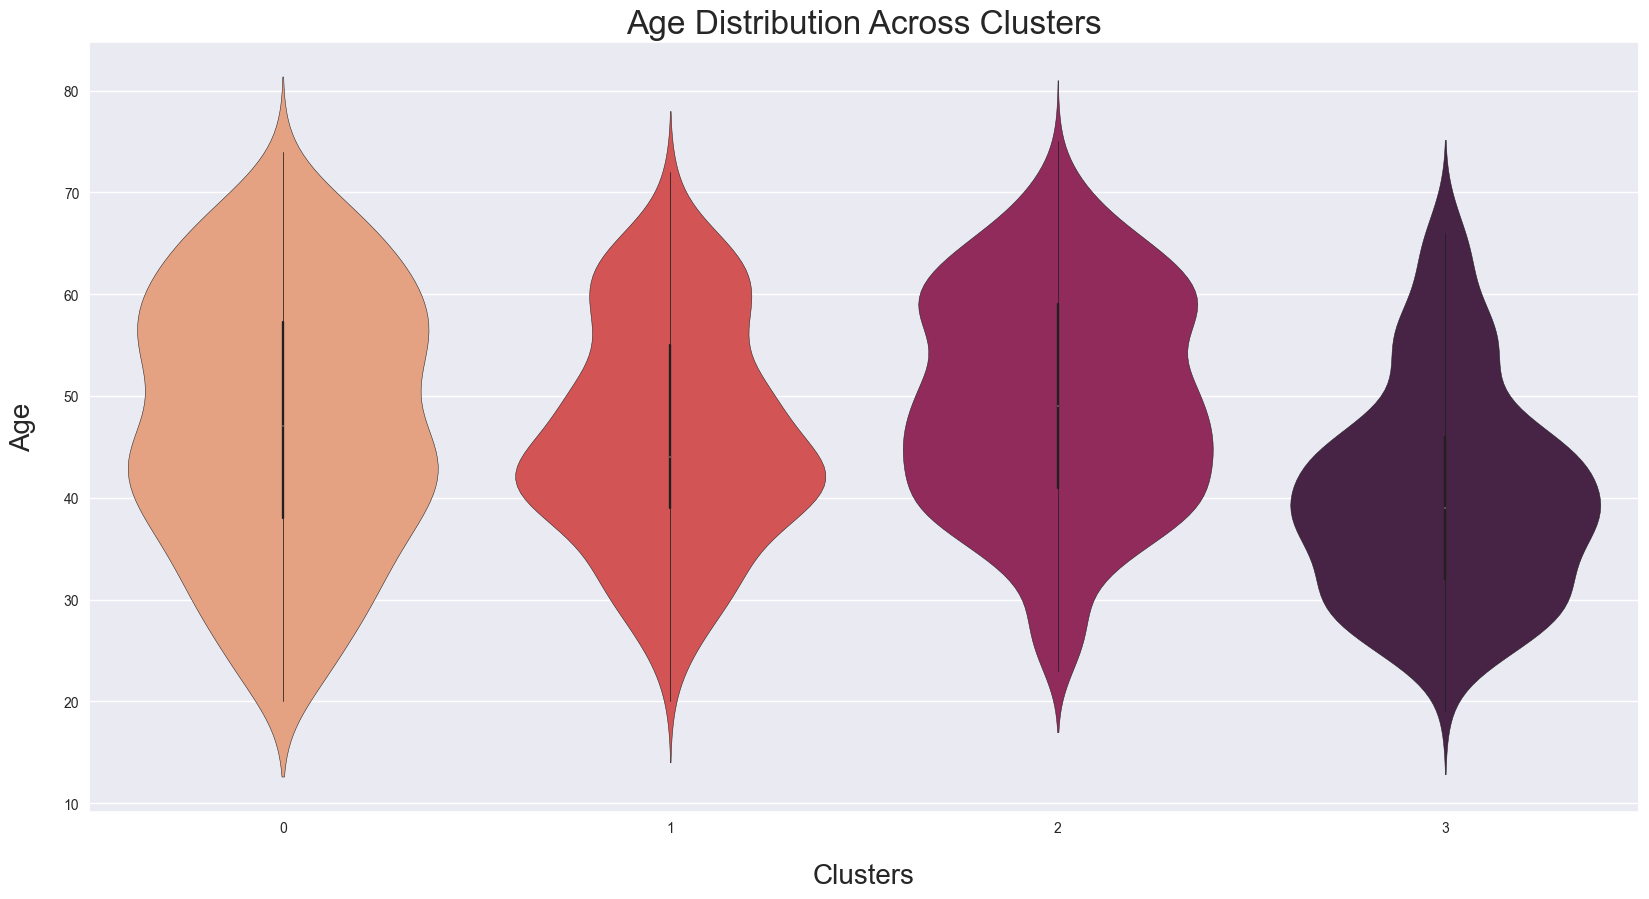

In [14]:
#Age
plt.figure(figsize=(20, 10))

sns.violinplot(data=kmeans_model, x='clusters', y='Age', palette='rocket_r')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Age', fontsize=20, labelpad=20)
plt.title('Age Distribution Across Clusters', fontsize=24)

plt.show()


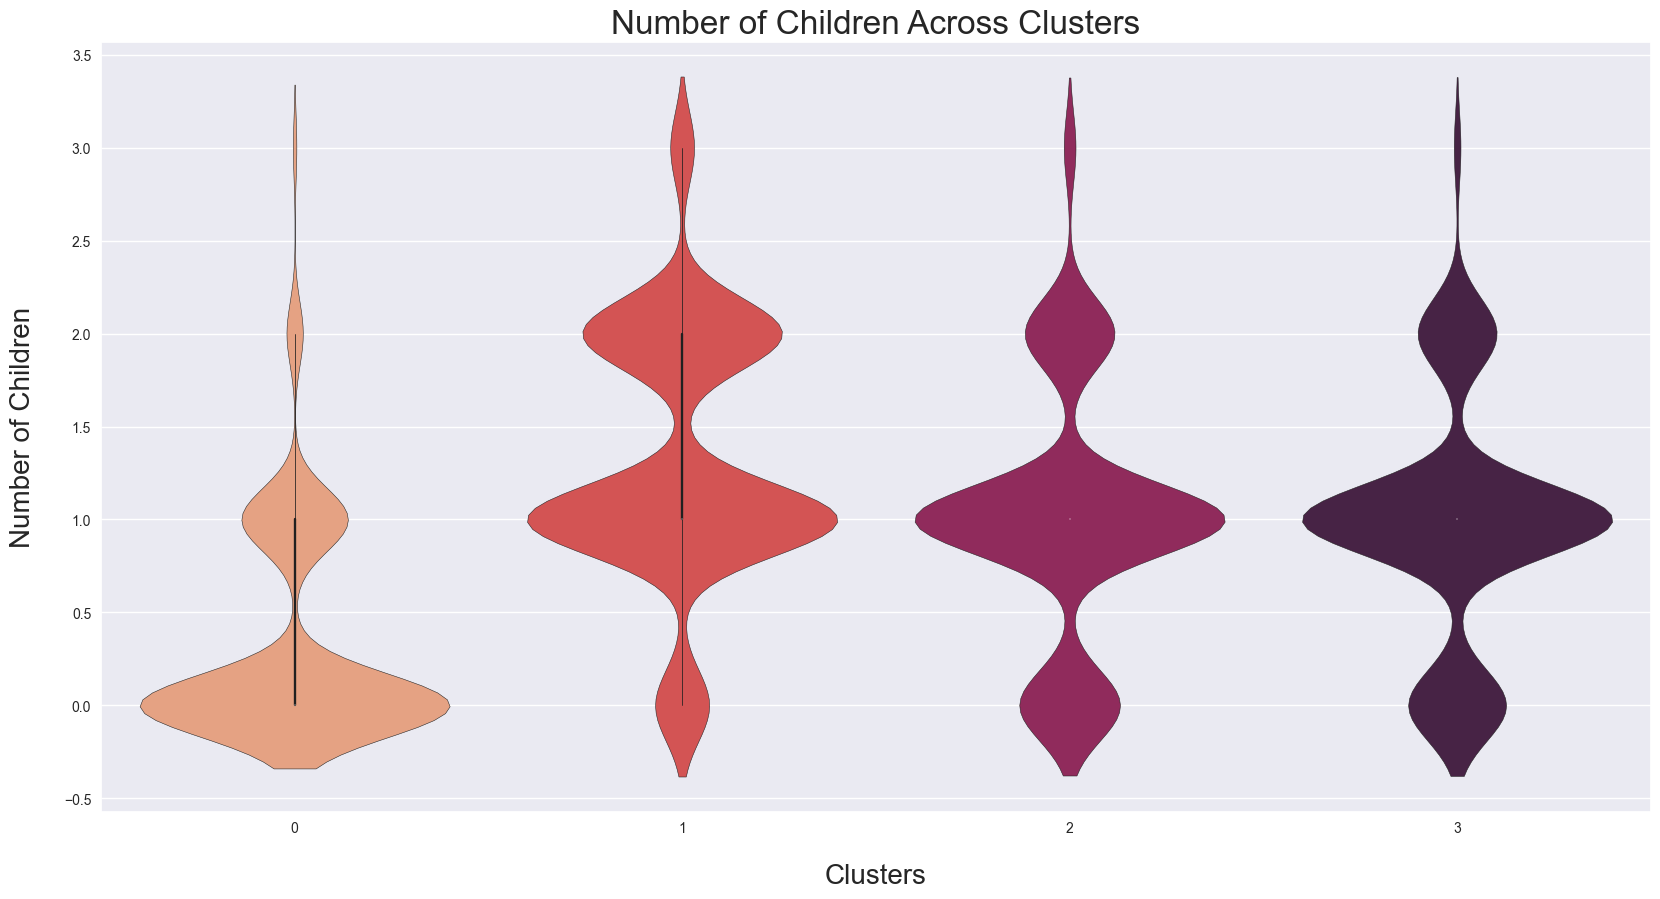

In [15]:
#Number of children
plt.figure(figsize=(20, 10))

sns.violinplot(data=kmeans_model, x='clusters', y='Children', palette='rocket_r')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Number of Children', fontsize=20, labelpad=20)
plt.title('Number of Children Across Clusters', fontsize=24)

plt.show()


From the analysis above, we can categorize customers into 4 segments based on their income and total expenses:

**Platinum**: Highest income and highest spending

**Gold**: High earning and high spending

**Silver**: Lower salary and less expenses

**Bronze**: Lowest salary and fewest expenses

#### **Data Exploration: Segmentation Based** ####

In [16]:
kmeans_model.clusters = kmeans_model.clusters.replace({3: 'Bronze',
                                                             0: 'Platinum',
                                                             1: 'Silver',
                                                             2: 'Gold'})

df['clusters'] = kmeans_model.clusters

#### **Customers Distribution** ####

In [17]:
import plotly.express as px
cluster_counts = df.clusters.value_counts()

fig = px.pie(cluster_counts, 
             values = cluster_counts.values, 
             names = cluster_counts.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=20,
                  marker = dict(line = dict(color = 'white', width = 2)))
fig.show()

#### **Relationship: Income vs. Expenses**

Text(0, 0.5, 'Total Expenses')

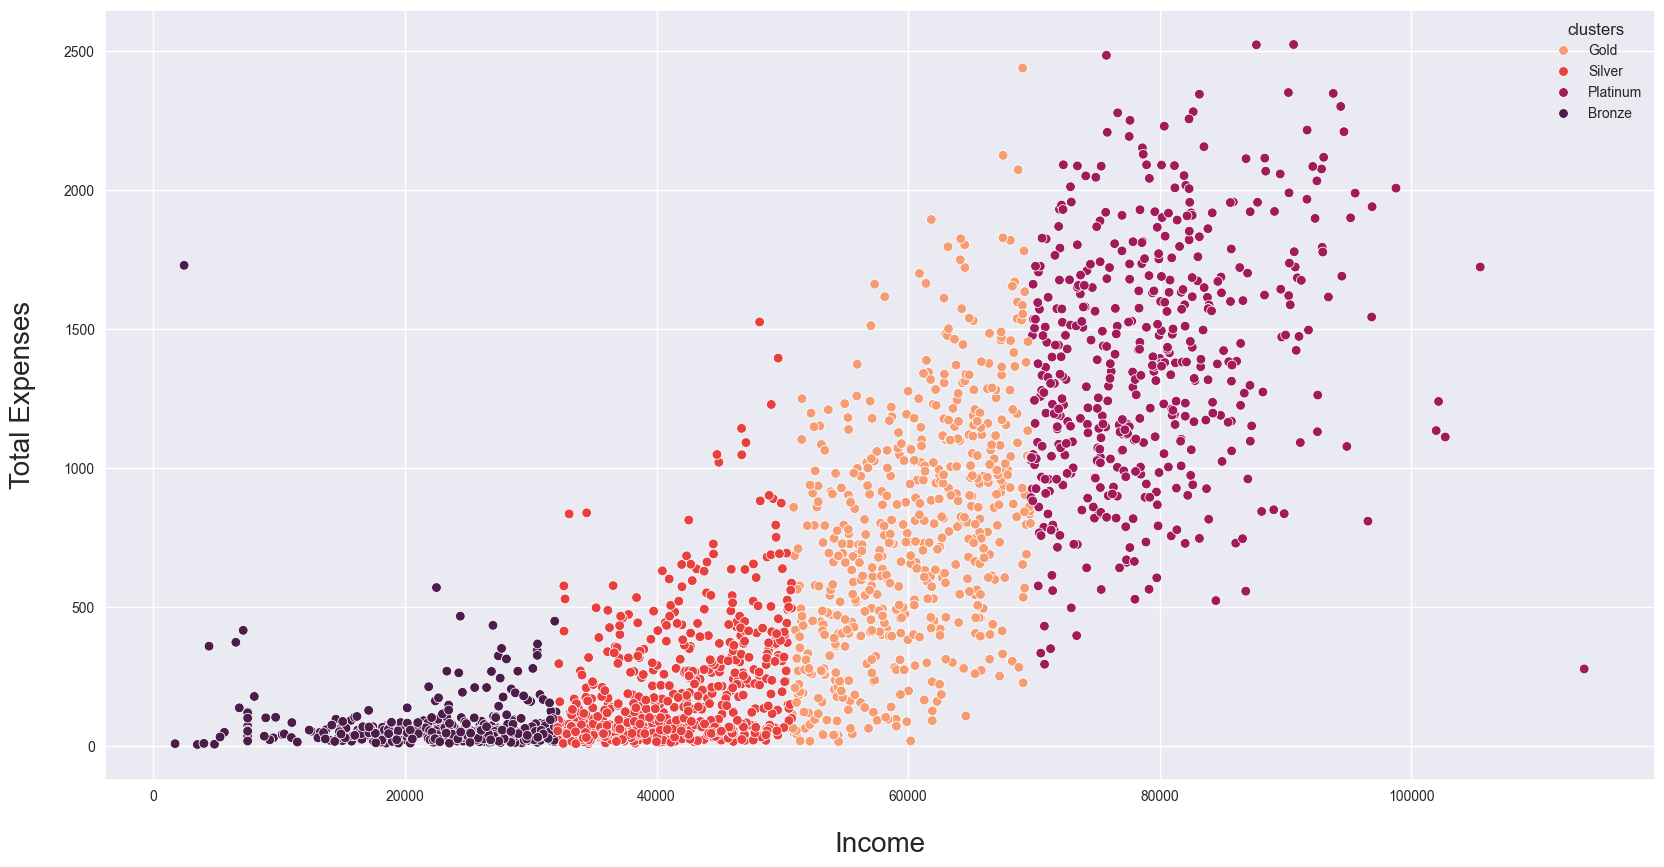

In [18]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df, x='Income', y='Total_Expenses', hue='clusters', palette='rocket_r')
plt.xlabel('Income', fontsize=20, labelpad=20)
plt.ylabel('Total Expenses', fontsize=20, labelpad=20)

#### **Insights**
The plot clearly shows 4 distinct groups.
People who earn more also tend to spend more.

#### **Spending Patterns by Clusters**

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Bronze'),
  Text(1, 0, 'Gold'),
  Text(2, 0, 'Platinum'),
  Text(3, 0, 'Silver')])

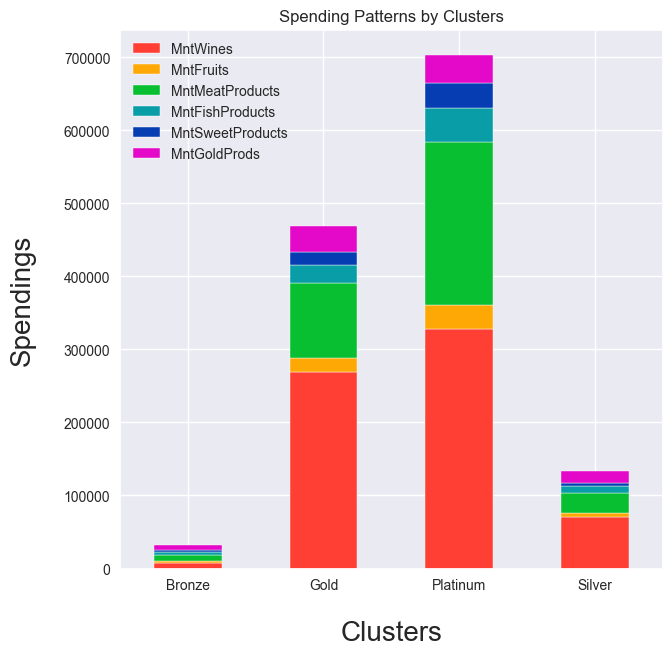

In [19]:
cluster_spendings = df.groupby('clusters')[['MntWines', 'MntFruits','MntMeatProducts', 
                                                  'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

cluster_spendings.plot(kind='bar', stacked=True, figsize=(7,7), color=['#ff3f33','#fea806','#07bf31','#089da7','#063db2','#e408c9'])

plt.title('Spending Patterns by Clusters')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20)
plt.xticks(rotation=0, ha='center')

In [20]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Tenure_Month,Total_Expenses,AgeGroup,Children,clusters
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,3,11,1,58,28.0,1617,Middle Age Adult,0,Gold
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,3,11,0,61,10.0,27,Senior Adult,2,Silver
2,4141,1965,Graduation,Married,71613.0,0,0,2013-08-21,26,426,...,0,3,11,0,50,17.0,776,Middle Age Adult,0,Platinum
3,6182,1984,Graduation,Married,26646.0,1,0,2014-02-10,26,11,...,0,3,11,0,31,11.0,53,Adult,1,Bronze
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,3,11,0,34,12.0,422,Adult,1,Gold


#### **Purchasing Behavior by Clusters**

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Bronze'),
  Text(1, 0, 'Gold'),
  Text(2, 0, 'Platinum'),
  Text(3, 0, 'Silver')])

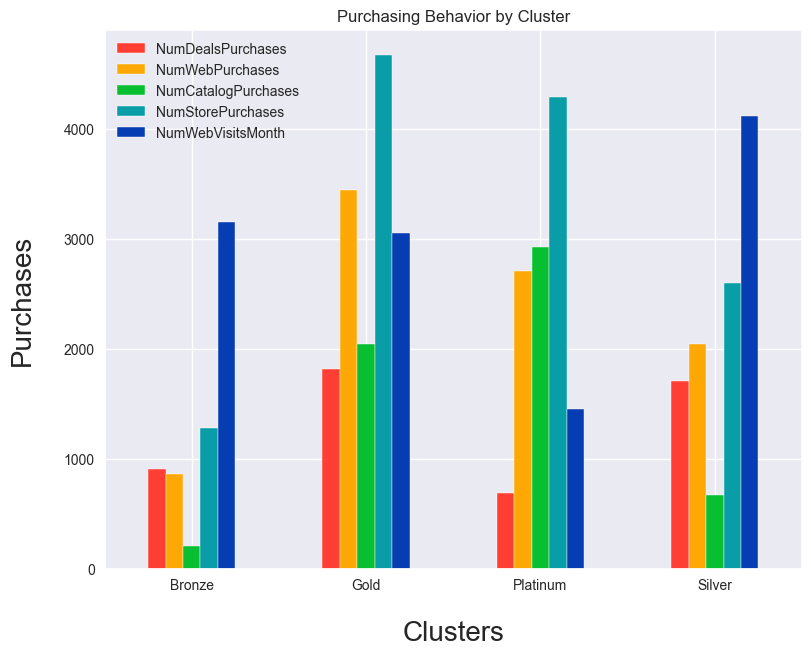

In [21]:
cluster_purchases = df.groupby('clusters')[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                                                  'NumStorePurchases', 'NumWebVisitsMonth']].sum()

cluster_purchases.plot(kind='bar', color=['#ff3f33','#fea806','#07bf31','#089da7','#063db2','#e408c9'], figsize=(9,7))

plt.title('Purchasing Behavior by Cluster')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Purchases', fontsize=20, labelpad=20)
plt.xticks(rotation=0, ha='center')

#### **Insights**
1.platinum and Gold customers are primarily inclined towards in-store purchases.

2.The majority of web and catalog purchases are also conducted by customers in the Platinum and Gold segments.

3.Customers in the Silver and Gold segments also favor shopping in-store.

4.Gold and Silver customers frequently take advantage of promotional deals.

5.Silver customers have the highest number of web visits, while Platinum customers have the fewest.

#### **Promotions Response by Clusters**

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Bronze'),
  Text(1, 0, 'Gold'),
  Text(2, 0, 'Platinum'),
  Text(3, 0, 'Silver')])

<Figure size 3000x1500 with 0 Axes>

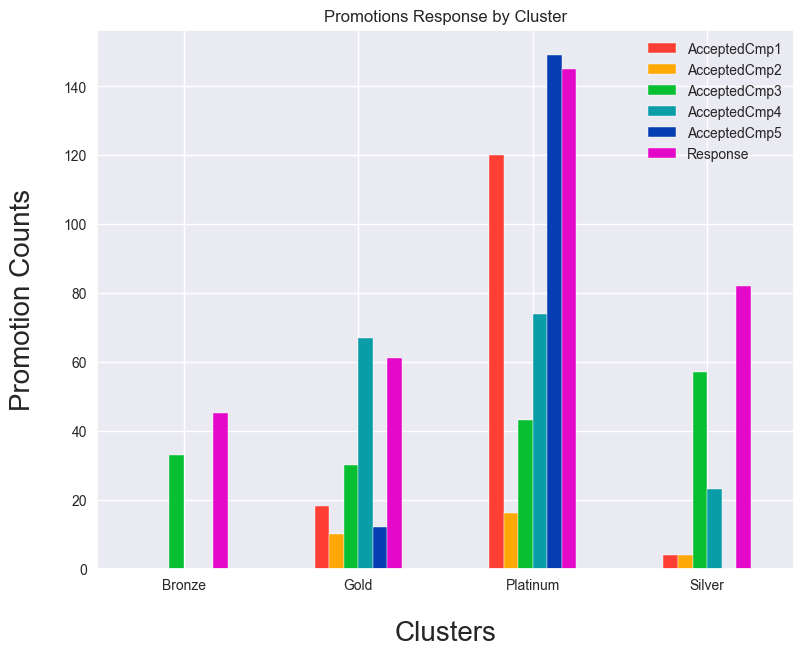

In [22]:
cluster_campaign = df.groupby('clusters')[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 
                                                  'AcceptedCmp5', 'Response']].sum()

plt.figure(figsize=(30,15))
cluster_campaign.plot(kind='bar', color=['#ff3f33','#fea806','#07bf31','#089da7','#063db2','#e408c9'],figsize=(9,7))

plt.title('Promotions Response by Cluster')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Promotion Counts', fontsize=20, labelpad=20)
plt.xticks(rotation=0, ha='center')

#### **Insights**
1.Gold subscribers get the most offers from the company.

2.Campaigns 1, 5, and the latest are the most effective.

3.Bronze customers show the least interest in the company's promotions.

#### **Concusion**
1.The majority of customers are university graduates.

2.Most customers live with partners.

3.Individuals who live alone spend more than those with partners.

4.Most customers have only one child.

5.Childless customers have higher spending.

6.Middle-aged adults (40-60 years) are a prominent age group.

7.Middle-aged adults have the highest average spending compared to other age groups.

8.Most customers earn between $25,000 and $85,000.

9.Wine and meat products are very popular among customers.

10.Based on income and total expenses, customers are categorized into four clusters: Platinum, Gold, Silver, and Bronze.

11.Most customers fall into the Silver and Gold categories.

12.Higher earners tend to spend more.

13.Most customers prefer shopping in-store, followed by online purchases.

14.Platinum subscribers are more receptive to promotional campaigns, while Bronze subscribers show the least interest.






